In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Loading data

In [2]:
df = pd.read_csv("Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
df.Language.value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [4]:
df.shape

(10337, 2)

In [5]:
df.isna().sum()

Text        0
Language    0
dtype: int64

## Feature Engineering

In [6]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [7]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [8]:
df.Language.unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [9]:
df.Language.replace(to_replace=['Portugeese','Sweedish'],value=['Portuguese','Swedish'],inplace=True)

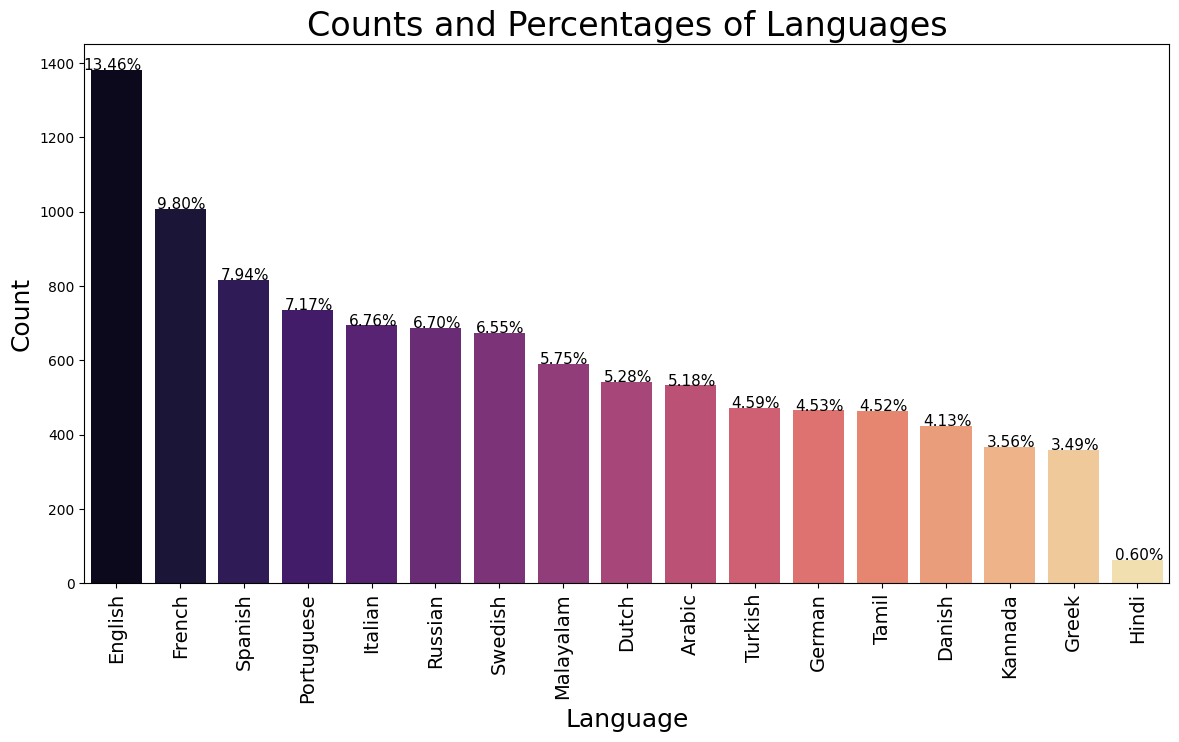

In [10]:
plt.figure(figsize=(14,7))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=11, ha='right')
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(size= 14, rotation=90) 
plt.show()

In [11]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


## Text Preprocessing

In [12]:
def cleaner(x):
  x = re.sub(r'[\([{})\]!@#$,"%^*?:;~]', ' ', x)
  x = re.sub(r"\\|[0-9]|/|-|_|'|\.", '', x)
  x = re.sub('\s+', ' ', x)  
  x = x.lower()
  return x

df['Text'] = df['Text'].map(cleaner)

In [13]:
df['num_words'] = df['Text'].apply(len)

In [14]:
df[df['num_words'] <= 3]

,Text,Language,num_words
2290,வா,Tamil,2
5087,,Spanish,1
6035,,Russian,1
6056,,Russian,1
6704,pr,Danish,2
7598,dai,Italian,3
8867,lov,Swedish,3
9109,,Arabic,0


In [15]:
# Filter rows where 'num_words' <= 4
df = df[df['num_words'] > 3]

df.reset_index(drop=True, inplace=True)

In [16]:
df.num_words.describe()

# 75% of sent length is less than 160.

count    10263.000000
mean       120.108156
std        241.824337
min          4.000000
25%         42.000000
50%         96.000000
75%        160.000000
max      17972.000000
Name: num_words, dtype: float64

In [17]:
max_len = 160   # vocabulary size (for Bi-LSTM)

## Encoding Target Variable

In [18]:
labels_dict = {}
for idx, lang in enumerate(df.Language.unique()):
    labels_dict[lang] = idx
labels_dict

{'English': 0,
 'Malayalam': 1,
 'Hindi': 2,
 'Tamil': 3,
 'Portuguese': 4,
 'French': 5,
 'Dutch': 6,
 'Spanish': 7,
 'Greek': 8,
 'Russian': 9,
 'Danish': 10,
 'Italian': 11,
 'Turkish': 12,
 'Swedish': 13,
 'Arabic': 14,
 'German': 15,
 'Kannada': 16}

In [19]:
df['Label'] = df['Language'].map(labels_dict)
df.head()

C:\Users\DEVANSH\AppData\Local\Temp\ipykernel_18616\62589088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Language'].map(labels_dict)


,Text,Language,num_words,Label
0,nature in the broadest sense is the natural p...,English,80,0
1,nature can refer to the phenomena of the phys...,English,84,0
2,the study of nature is a large if not the only...,English,62,0
3,although humans are part of nature human activ...,English,121,0
4,the word nature is borrowed from the old fren...,English,183,0


In [20]:
labels = {v: k for k, v in labels_dict.items()}

## Bag Of Words

In [21]:
X = df['Text']
y = df['Label']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10263, 40163)

## Train-Test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True,stratify=y)

In [24]:
y_test.value_counts()

Label
0     346
5     252
7     204
4     184
11    173
9     172
13    168
1     148
6     135
14    133
12    118
3     116
15    116
10    106
16     91
8      89
2      15
Name: count, dtype: int64

## Building model and Evaluating

### MultinomialNB

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [26]:
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9781761496492596
F1 Score: 0.978519639359984


### LinearSVC

In [27]:
# from sklearn.svm import SVC

# svm_classifier = SVC(kernel='linear')

# # Fit the model on the training data
# svm_classifier.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = svm_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Calculate weighted F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Weighted F1 Score:", f1)

### RFF

In [28]:
# from sklearn.ensemble import RandomForestClassifier

# rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)  # You can adjust hyperparameters

# # Fit the model on the training data
# rf_classifier.fit(X_train, y_train)

In [29]:
# y_pred = rf_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Calculate weighted F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Weighted F1 Score:", f1)

### SGDClassifier

In [30]:
# from sklearn.linear_model import SGDClassifier

# sgd_classifier = SGDClassifier(random_state=42)  # You can adjust hyperparameters

# # Fit the model on the training data
# sgd_classifier.fit(X_train, y_train)

In [31]:
# y_pred = sgd_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Calculate weighted F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Weighted F1 Score:", f1)

## KNN

In [32]:
# from sklearn.neighbors import KNeighborsClassifier

# knn_classifier = KNeighborsClassifier()  # You can adjust the number of neighbors (k)

# # Fit the model on the training data
# knn_classifier.fit(X_train, y_train)

In [33]:
# y_pred = knn_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Calculate weighted F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Weighted F1 Score:", f1)

## XGBoost

In [34]:
# import xgboost as xgb

# xgb_classifier = xgb.XGBClassifier()

# # Fit the model on the training data
# xgb_classifier.fit(X_train, y_train)

In [35]:
# y_pred = xgb_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Calculate weighted F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Weighted F1 Score:", f1)

MultinomialNB - Accuracy: 0.9781761496492596
F1 Score: 0.978519639359984

RFF - Accuracy: 0.9243959469992206
Weighted F1 Score: 0.9341472140643168

SGD - Accuracy: 0.9660950896336711
Weighted F1 Score: 0.9671129109914076

KNN - Accuracy: 0.5179267342166797
Weighted F1 Score: 0.5867972816678195

## Making Predictions

In [53]:
def prediction(text):
    x = CV.transform(text).toarray()
    lang= int(nb_classifier.predict(x))
    lang = labels[lang]
    print(f"This word/sentence contains {lang} word(s).")

In [57]:
prediction(["студент преподает"])

This word/sentence contains Russian word(s).


## Bi-LSTM

### Train-Test

In [ ]:
X = df['Text']
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42,shuffle=True, stratify=y)

## Sentence to Seq

In [ ]:
NUM_WORDS = 1000000
MAX_LEN = 160
NUM_CLASSES = 17

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers

In [ ]:
def tokenize_and_sequence(train_sentences, test_sentences, num_words=NUM_WORDS, maxlen=MAX_LEN):
    print(f"num_words: {num_words}")
    tok = Tokenizer(num_words=num_words, oov_token='<OOV>')
    tok.fit_on_texts(train_sentences)
    
    train_sequences = tok.texts_to_sequences(train_sentences)
    train_sequences = pad_sequences(train_sequences, padding='post', maxlen=maxlen, truncating='post')
    
    test_sequences = tok.texts_to_sequences(test_sentences)
    test_sequences = pad_sequences(test_sequences, padding='post', maxlen=maxlen, truncating='post')
    
    return train_sequences, test_sequences, tok

In [ ]:
X_train, X_test, tok = tokenize_and_sequence(X_train, X_test)

num_words: 1000000


## Model

In [ ]:
class LanguageModel(tf.keras.Model):
    def __init__(self, vocab_dim=NUM_WORDS, max_len=MAX_LEN, num_classes=NUM_CLASSES):
        super(LanguageModel, self).__init__()
        self.embedding = layers.Embedding(vocab_dim, 64, input_length=max_len)
        self.lstm1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))
        self.lstm2 = layers.Bidirectional(layers.LSTM(32, return_sequences=True))
        self.lstm3 = layers.Bidirectional(layers.LSTM(16))
        self.dense = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.5)
        self.classifier = layers.Dense(num_classes, activation='softmax')
    
    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x = self.lstm1(x)
        x = self.lstm2(x)
        x = self.lstm3(x)
        x = self.dense(x)
        if training:
            x = self.dropout(x, training=training)
        return self.classifier(x)

In [ ]:
model = LanguageModel(num_classes=NUM_CLASSES)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1)
# model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size=256,epochs=25,callbacks=[early_stopping])

# # loss: 0.2230 - accuracy: 0.9256 - val_loss: 0.5357 - val_accuracy: 0.8698

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1)
model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size=64,epochs=25,callbacks=[early_stopping])

Epoch 1/25


61/61 [==============================] - 132s 2s/step - loss: 2.6284 - accuracy: 0.1498 - val_loss: 2.1407 - val_accuracy: 0.3079
Epoch 2/25
61/61 [==============================] - 115s 2s/step - loss: 1.9868 - accuracy: 0.3243 - val_loss: 1.6069 - val_accuracy: 0.4271
Epoch 3/25
61/61 [==============================] - 126s 2s/step - loss: 1.4937 - accuracy: 0.4634 - val_loss: 1.3065 - val_accuracy: 0.5561
Epoch 4/25
61/61 [==============================] - 119s 2s/step - loss: 1.1359 - accuracy: 0.5880 - val_loss: 0.9767 - val_accuracy: 0.6800
Epoch 5/25
61/61 [==============================] - 127s 2s/step - loss: 0.8458 - accuracy: 0.7065 - val_loss: 0.8165 - val_accuracy: 0.7557
Epoch 6/25
61/61 [==============================] - 122s 2s/step - loss: 0.6204 - accuracy: 0.7900 - val_loss: 0.6168 - val_accuracy: 0.8122
Epoch 7/25
61/61 [==============================] - 114s 2s/step - loss: 0.4775 - accuracy: 0.8415 - val_loss: 0.6092 - val_accuracy: 0.8332
Epoch 8/25
61/61 [======

In [ ]:
y_pred = model.predict(X_test, batch_size=128, verbose=1)
y_pred = y_pred.argmax(axis=1)

21/21 [==============================] - 4s 182ms/step


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy = {acc:.2%}")

# Accuracy = 88.93%

Accuracy = 88.93%


## Making Predictions

In [ ]:
new_sentences = ["Questa è una nuova frase. Come stai"]
new_sequences = tok.texts_to_sequences(new_sentences)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = MAX_LEN  # Use the same maxlen as during training
new_sequences = pad_sequences(new_sequences, padding='post', maxlen=maxlen, truncating='post')


In [ ]:
# Assuming you have a trained model
predictions = model.predict(new_sequences)

1/1 [==============================] - 0s 58ms/step


In [ ]:
predictions.argmax()

11

In [ ]:
labels[predictions.argmax()]

'Italian'

## Saving necessary items

In [58]:
import pickle
pickle.dump(nb_classifier, open("model.pkl", "wb"))
pickle.dump(CV, open("transform.pkl", "wb"))
pickle.dump(labels, open("encoder.pkl","wb"))